### Лабораторная работа №5
#### Идентификация параметров линейного регрессионного объекта при α− загрязненных шумах

Пусть линейный регрессионный объект имеет вид:
$$ \large y(i)=с_{0}+с_{1}u_{1}(i)+...+с_{4}u_{4}(i)+\eta(i) , $$ 

где шум, действующий на объект, принадлежит классу приближенно нормальных распределений:
$ \large f(\eta) = (1-\alpha)f_N(\eta) + \alpha g(\eta) $ <br>
$ \large f_N(\eta) = \frac{1}{\sqrt{2 \pi} \sigma_\eta} exp(- \frac{\eta^2}{2 \sigma^2_\eta}) $ - нормальное распределение $ \large N(0, \sigma_\eta)$, <br>
$\large \alpha$ - вероятность появление выброса с рапределением $\large g(\eta)$ <br>
$\large g(\eta)$ - вообще говоря какое-то распределение, но в данной лабораторной работе будет нормальным $ \large N(0, \sigma_\eta (outlier))$, но его параметры отличны от $\large f_N(\eta)$

In [126]:
# параметры объекта 
c0 = 1.5
c1 = 2.5
c2 = -3.5
c3 = 4.5
c4 = 5
c = [c0, c1, c2, c3, c4]

In [127]:
# количество измерений
N=50

#### Сгенерируем шум, принадлежащий классу приближенно нормальных распределений

In [128]:
import numpy as np
from scipy.stats import rv_continuous
import math
from sympy import *
from scipy.integrate import quad

In [129]:
# класс для "загрязненного" распределения
class gaussian_gen(rv_continuous):
    
    def _pdf(self, x, alpha, sigma_1, sigma_2):
        "Gaussian distribution"
        def gaussian(self, x, sigma):
            return np.exp(-x**2 / 2. / sigma**2) / (np.sqrt(2.0 * np.pi)*sigma)
        
        return (1-alpha)*gaussian(self, x, sigma_1)+alpha*gaussian(self, x, sigma_2)

gaussian = gaussian_gen(name='dirty_distrib')

Зададим следующие параметры нашего загрязненного распределения для шума:

In [130]:
# alpha = 0.1
# sigma_1 = 0.5
# sigma_2 = 50
# Noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)

#### Посмотрим на сгенерированный шум и увидим "выбросы" из другого распределения

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
# plt.plot(Noise)
# plt.grid()

#### Зададим параметры входов объекта и смоделируем выход объекта

In [133]:
#Ваш код здесь
Avg_U1=0
Var_U1=50
Avg_U2=0
Var_U2=50
Avg_U3=0
Var_U3=50
Avg_U4=0
Var_U4=50

In [134]:
#Ваш код здесь
# U1=np.random.normal(Avg_U1, Var_U1, N)
# U2=np.random.normal(Avg_U2, Var_U2, N)
# U3=np.random.normal(Avg_U3, Var_U3, N)
# U4=np.random.normal(Avg_U4, Var_U4, N)

In [135]:
# моделирование выхода объекта
# y=c0+c1*U1+c2*U2+c3*U3+c4*U4+Noise

In [136]:
# plt.plot(y)
# plt.grid()

### Эффективность алгоритма Хубера vs Рекуррентным МНК при различных статистических характеристиках распределений

В лабораторной работе требуется:

1. Реализовать __class Huber__ c методами: <br>
   * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br>
    2) параметр $ \xi $, участвующий в функции потерь Хьюбера, в зависимости от вероятности появления выброса $ \alpha $ (значения которого приведены в описании ЛР) <br><br>
   *   __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием функции потерь Хьюбера:<br>
        <br>
        Input:<br>
            X - матрица входов объекта, [X] = m x N <br>
            y - вектор выходов объекта, [y] = N <br>
            с0 - вектор начального приближения, [c0] = m <br>
        <br>       
   * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_huber - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>
2. Реализовать __class RecurrentMLS__ с методами: <br>

    * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br><br>

    * __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием квадратичной функции потерь (см. 2 лабораторную работу):<br>
         <br>
     Input:<br>
             X - матрица входов объекта, [X] = m x N<br>
             y - вектор выходов объекта, [y] = N<br>
             с0 - вектор начального приближения, [c0] = m+1<br><br>
        
    * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_recMLS - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>        
3. Реализовать функцию __smooth_errors(c_estim, c_true)__  - вычисляет сглаженную ошибку оценки по 10 измерениям. <br>
         Input: 
             c_estim - массив оценок параметров объекта, [c_estim] = m+1 x N
             c_true - вектор истинных параметров объекта, [c_true] = m+1 
         Output:
             err - массив сглаженных ошибок оценки
              
4. Провести исследование эффективности алгоритма Хубера по сравнению с рекуррентным МНК алгоритмом при следующих статистических характеристиках распределений:<br>
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 100;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 100. <br><br>
5. Построить графики сходимости сглаженной ошибки оценки по двум алгоритмам: алгоритм с использованием теоремы Хубера и рекуррентный алгоритм, соответствующий методу наименьших квадратов. Сдалать выводы.

### Hints

1. Рекуррентный алгоритм при функции потерь Хьюбера имеет вид:
\begin{equation} \large \hat{\vec{c}}(i)=\hat{\vec{c}}(i-1)+Г(i)d(\varepsilon(i, \hat{\vec{c}}(i-1)))\vec{z}(i) \\
\large Г(i)=Г(i-1)-\frac{Г(i-1)\vec{z}(i)\vec{z}(i)^TГ(i-1)}{I^{-1}_F+\vec{z}^T(i)Г(i-1)\vec{z}(i)} \\
\large Г(0)=\lambda I, \lambda >> 1,  \hat{\vec{c}}(0)=\vec{c}_{0}\end{equation}

где $ \large  \Delta = \xi\sigma_\eta$
\begin{equation} \large d(\varepsilon(i, \hat{\vec{c}}(i-1)))=\frac{dF(\varepsilon(i, \hat{\vec{c}}(i-1)))}{d\varepsilon}|_{\varepsilon = \varepsilon(i, \hat{\vec{c}}(i-1)))}= \left\{
    \begin{array}\\
        -\Delta, & \varepsilon(i) \leq -\Delta \\
        \varepsilon(i, \hat{\vec{c}}(i-1))), & -\Delta \leq |\varepsilon(i)| \leq \Delta\\
        \Delta, &  \varepsilon(i) \geq \Delta
    \end{array}  
\right.\end{equation}

\begin{equation} \large  I_F=2(1-\alpha)\frac{\Delta}{\sigma^2_\eta}f_N(\frac{\Delta}{\sigma_\eta})+(1-\alpha)\frac{1}{\sqrt{2\pi}\sigma_\eta}\frac{1}{\sigma^4_\eta}\int_{-\Delta}^\Delta \eta^2exp(\frac{-\eta^2}{2\sigma^2_\eta})d\eta\end{equation}

2. Для вычислении информации Фишера можно использовать модуль __sympy__ (https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [137]:
class Huber():
    def __init__(self, Lambda, xi):
        self.Lambda = Lambda
        self.xi = xi
        self.delta = xi * sigma_1
        self.coefs = np.empty([N,5])
        self.coefs[0] = np.array(c)
        self.If = self.fisher()
        
    def fN(self, eta):
        return math.exp(-eta**2 / (2 * sigma_1**2)) / (math.sqrt(2*math.pi) * sigma_1)
    
    def integral(self):
        x = Symbol('x')
        expr = lambda x: x*x*math.exp(-x**2/(2*sigma_1**2))
        return quad(expr, -self.delta, self.delta)[0]
        
        
    def fisher(self):
        return (
            2 * (1-alpha) * (self.delta/sigma_1**2) * self.fN(self.delta/sigma_1)
            + (1-alpha)*self.integral()/(math.sqrt(2*math.pi)*sigma_1**5)
        )
    
    def d(self, eps):
        if eps < -self.delta:
            return -self.delta
        if abs(eps) >= -self.delta and abs(eps) <= self.delta:
            return eps
        if eps > self.delta:
            return self.delta
        
    def fit(self, X, y, c):
        Gamma = [None]*N
        I = np.eye(5)
        Gamma[0] = self.Lambda*I
        for i in range(1, N):
            z = X[i].reshape(-1, 1)
            eps = y[i] - (self.coefs[i-1].T@z)
            Gamma[i] = Gamma[i-1] - (Gamma[i-1]@z@z.T@Gamma[i-1]) / (1 / self.If + z.T@Gamma[i-1]@z)
            self.coefs[i] = self.coefs[i-1] + (Gamma[i] * self.d(eps)@z).reshape(-1,)
                              
    def get_coefs(self):
        return self.coefs
        
        

In [138]:
class RecurentMLS():
    def __init__(self, Lambda):
        self.Lambda = Lambda
        self.coefs = np.empty([N,5])
        self.coefs[0] = np.array(c)
    def fit(self, X, y, c):
        Gamma = [None]*N
        I = np.eye(5)
        Gamma[0] = self.Lambda*I
        for i in range(1, N):
            z = X[i].reshape(-1, 1)
            eps = y[i] - (self.coefs[i-1].T@z)
            Gamma[i] = Gamma[i-1] - Gamma[i-1]@z@z.T@Gamma[i-1] / (1+z.T@Gamma[i-1]@z)
            self.coefs[i] = self.coefs[i-1]+ (Gamma[i]@z*(y[i]-z.T@self.coefs[i-1])).reshape(-1,)
            
    def get_coefs(self):
        return self.coefs
        

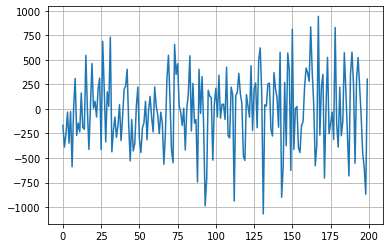

In [139]:
N=200
U1=np.random.normal(Avg_U1, Var_U1, N)
U2=np.random.normal(Avg_U2, Var_U2, N)
U3=np.random.normal(Avg_U3, Var_U3, N)
U4=np.random.normal(Avg_U4, Var_U4, N)
X = np.array([np.ones(N),U1,U2,U3,U4]).T
plt.plot(y)
plt.grid()

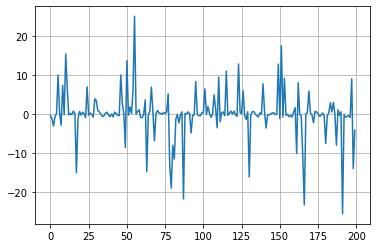

In [140]:
alpha = 0.3
sigma_1 = 0.5
sigma_2 = 10
Noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)
y=c0+c1*U1+c2*U2+c3*U3+c4*U4+Noise

plt.plot(Noise)
plt.grid()

In [142]:
def smooth_errors(c_estim, c_true):
    err = []*(N-10)
    for i in range(10, N):
        sum1 = 0
        for j in range(1, 10):
            for k in range(0, 4):
                sum1 += (c_estim[i-j][k] - c_true[k])**2
        err.append(math.sqrt(sum1/10))
    return err

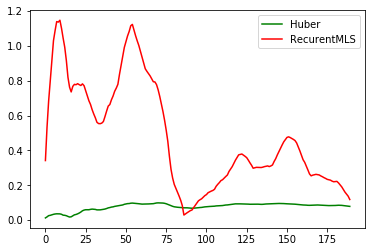

In [143]:
err1 = smooth_errors(coefs_1, c)
err2 = smooth_errors(coefs_2, c)
plt.plot(err1,color = 'g',label='Huber')
plt.plot(err2,color = 'r',label='RecurentMLS')
plt.legend()

In [144]:
print("coefs1", coefs_1[-1])
print("coefs2", coefs_2[-1])

coefs1 [ 1.57509415  2.50022991 -3.50193621  4.50127255  5.0040438 ]
coefs2 [ 1.54324091  2.49816392 -3.50621788  4.50323983  5.0059082 ]
